In [28]:
import os,sys
import numpy as np
codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import nsd_utils, default_paths, coco_utils
import PIL
import matplotlib.pyplot as plt
from matplotlib import cm
from model_fitting import initialize_fitting
from plotting_and_analysis import plot_utils 

In [7]:
subject = 1;
fn2load = os.path.join(default_paths.sketch_token_feat_path, 'PCA','S%d_PCA.npy'%subject)
pc_result = np.load(fn2load, allow_pickle=True).item()

scores_each_prf = pc_result['scores']
wts_each_prf = pc_result['wts']
ev_each_prf = pc_result['ev']

In [14]:
# Params for the spatial aspect of the model (possible pRFs)
aperture_rf_range = 1.1
aperture, models = initialize_fitting.get_prf_models(aperture_rf_range=aperture_rf_range)  
n_prfs = models.shape[0]

most extreme RF positions:
[-0.55 -0.55  0.04]
[0.55       0.55       0.40000001]


In [12]:
scores_each_prf[0].shape

(10000, 150)

In [17]:
import pandas as pd
from scipy.io import loadmat
import pickle

def get_subj_df(subject):
    """
    Get info about the 10,000 images that were shown to each subject.
    Note this is not the full ordered sequence of trials (which is 30,000 long)
    This is only the unique images 
    (matches what is in /user_data/mmhender/nsd_stimuli/stimuli/nsd/S1_stimuli....h5py)
    """
    exp_design_file = os.path.join(default_paths.nsd_root,"nsddata/experiments/nsd/nsd_expdesign.mat")
    exp_design = loadmat(exp_design_file)
    subject_idx  = exp_design['subjectim']
    
    nsd_meta_file = os.path.join(default_paths.nsd_root, 'nsddata/experiments/nsd/nsd_stim_info_merged.pkl')
    with open(nsd_meta_file,'rb') as f:
        stim_info = pickle.load(f,encoding="latin1")
    
    ss=subject-1
    subject_df = stim_info.loc[subject_idx[ss,:]-1]

    return subject_df

In [16]:
coco_trn, coco_val = coco_utils.init_coco()
cat_objects, cat_names, cat_ids, supcat_names, ids_each_supcat = coco_utils.get_coco_cat_info(coco_val)

In [18]:
subject_df = get_subj_df(subject);
all_coco_ids = np.array(subject_df['cocoId'])


Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255


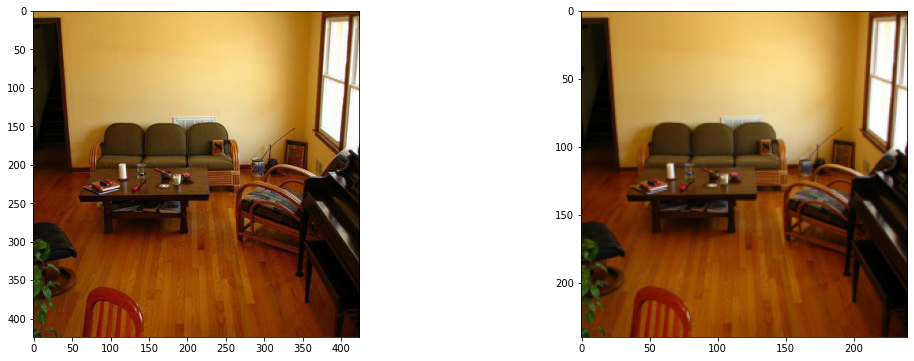

In [19]:
# Double check that the coco labels are correct
imageind = 15
cocoid = np.array(subject_df['cocoId'])[imageind]
cocoim = '/lab_data/tarrlab/common/datasets/NSD_images/images/%d.jpg'%cocoid
im = PIL.Image.open(cocoim)

plt.figure(figsize=(18,6));
plt.subplot(1,2,1)
plt.imshow(im)

ims = nsd_utils.get_image_data(subject)
plt.subplot(1,2,2)
plt.imshow(np.moveaxis(ims[imageind,:,:,:],[0,1,2],[2,0,1]))

In [20]:
ims_each_supcat = []
for sc, scname in enumerate(supcat_names):
    ims_in_supcat = coco_utils.get_ims_in_supcat(coco_trn, coco_val, scname, all_coco_ids)
    ims_each_supcat.append(ims_in_supcat)

In [148]:
models[np.array([420, 450, 508, 540, 700, 776, 830, 852, 870])]

array([[-0.15714286, -0.47142857,  0.05557982],
       [-0.15714286, -0.31428571,  0.05557982],
       [-0.31428571,  0.        ,  0.05557982],
       [-0.15714286,  0.15714286,  0.05557982],
       [ 0.44      ,  0.11      ,  0.07722791],
       [ 0.39285714, -0.07857143,  0.10730783],
       [-0.11      ,  0.11      ,  0.14910375],
       [ 0.18333333, -0.18333333,  0.207179  ],
       [-0.18333333,  0.55      ,  0.207179  ],
       [ 0.55      ,  0.55      ,  0.28787428]])

In [143]:
np.where(np.logical_and(np.logical_and(np.abs(models[:,0])<0.5,np.abs(models[:,1])<0.5), np.abs(models[:,2])>0.04))

(array([416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428,
        431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443,
        446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458,
        461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473,
        476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
        491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503,
        506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518,
        521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
        536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548,
        551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563,
        566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
        581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593,
        596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
        637, 638, 639, 640, 641, 642, 643, 644, 645

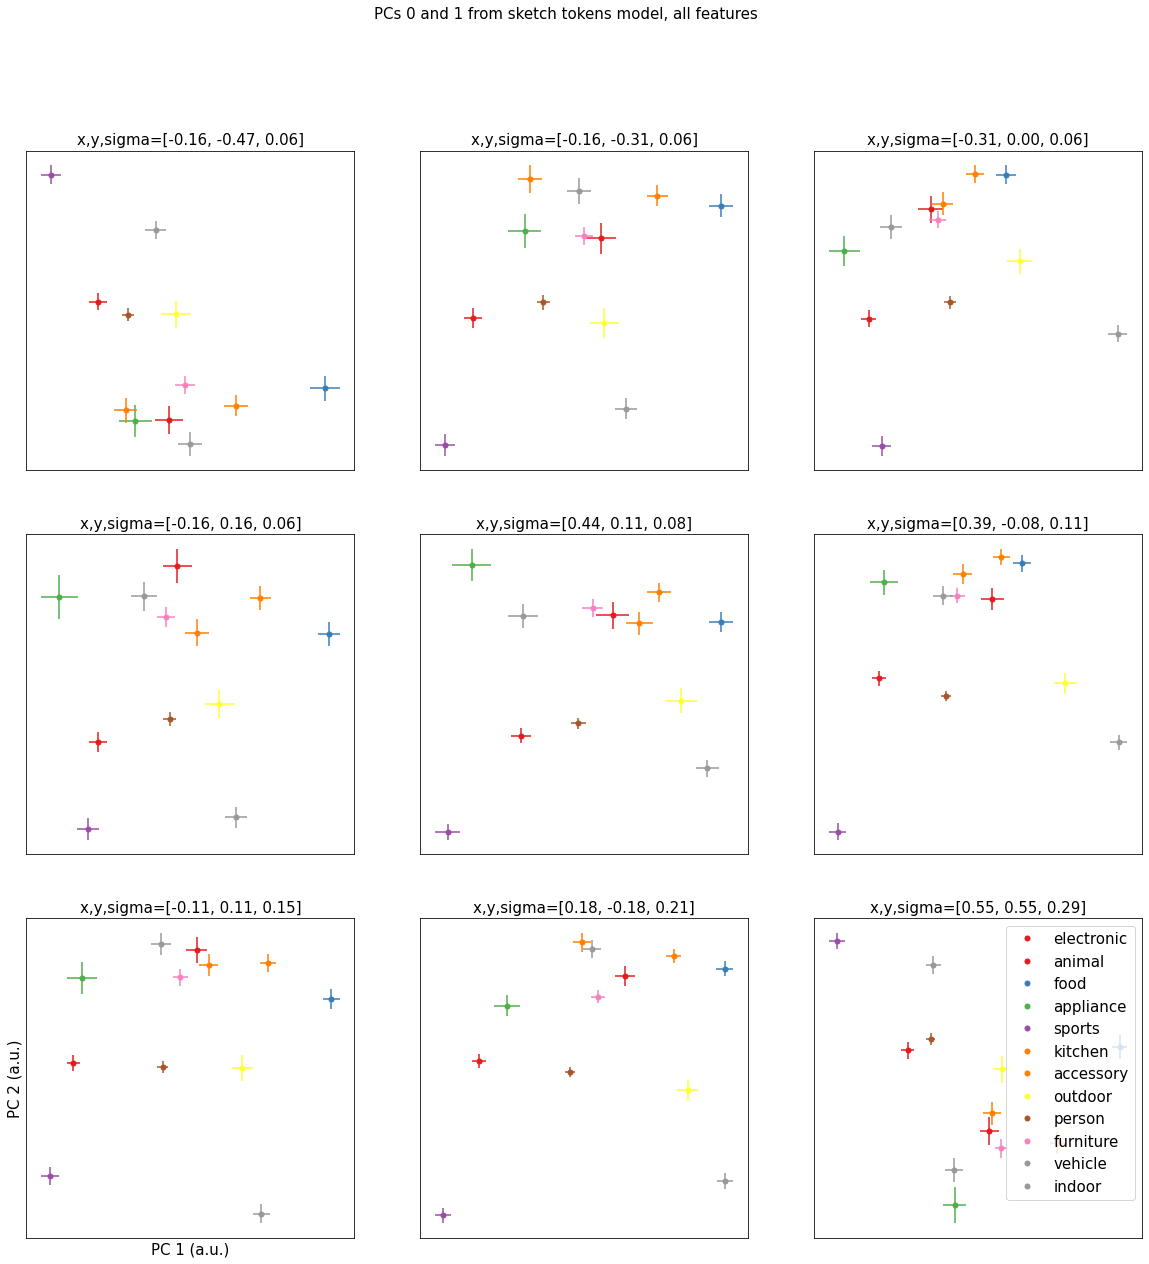

In [150]:
plot_utils.set_all_font_sizes(15)
plt.figure(figsize=(20,20));

pcs2plot = [0,1]
colors = cm.Set1(np.linspace(0,1,len(supcat_names)))

mm2plot = [420, 450, 508, 540, 700, 776, 830, 852, 870]
npx = int(np.ceil(np.sqrt(len(mm2plot))))
npy = int(np.ceil(len(mm2plot)/npx))

for mi, mm in enumerate(mm2plot):
    scores = scores_each_prf[mm]
    plt.subplot(npy,npx,mi+1)
    lh=[]
    for sc, scname in enumerate(supcat_names):
        ims_in_supcat = coco_utils.get_ims_in_supcat(coco_trn, coco_val, scname, all_coco_ids)
        
        meanvals = np.mean(scores[ims_in_supcat,:], axis=0)
        semvals = np.std(scores[ims_in_supcat,:], axis=0)/np.sqrt(np.sum(ims_in_supcat))
        
    #     plt.plot(scores[ims_in_supcat,pcs2plot[0]], scores[ims_in_supcat,pcs2plot[1]],'.',alpha=0.05,color=colors[sc])
        
        h, = plt.plot(meanvals[pcs2plot[0]], meanvals[pcs2plot[1]],'.',markersize=10,color=colors[sc])
        plt.errorbar(x = meanvals[pcs2plot[0]], y = meanvals[pcs2plot[1]], \
                     yerr = semvals[pcs2plot[1]], xerr = semvals[pcs2plot[0]], color=colors[sc])
        lh.append(h)
        
        
    if mi==len(mm2plot)-1:
        plt.legend(handles=lh,labels=supcat_names)
    if mi==len(mm2plot)-npx:
        plt.xlabel('PC %d (a.u.)'%(pcs2plot[0]+1))
        plt.ylabel('PC %d (a.u.)'%(pcs2plot[1]+1))
    
    plt.xticks([])
    plt.yticks([])
    
    plt.title('x,y,sigma=[%.2f, %.2f, %.2f]'
          %(models[mm,0], models[mm,1], models[mm,2]));
    
plt.suptitle('PCs %d and %d from sketch tokens model, all features\n'%(pcs2plot[0], pcs2plot[1]));
    


Text(0.5, 0.98, 'PCs variance explained from sketch tokens model, all features\n')

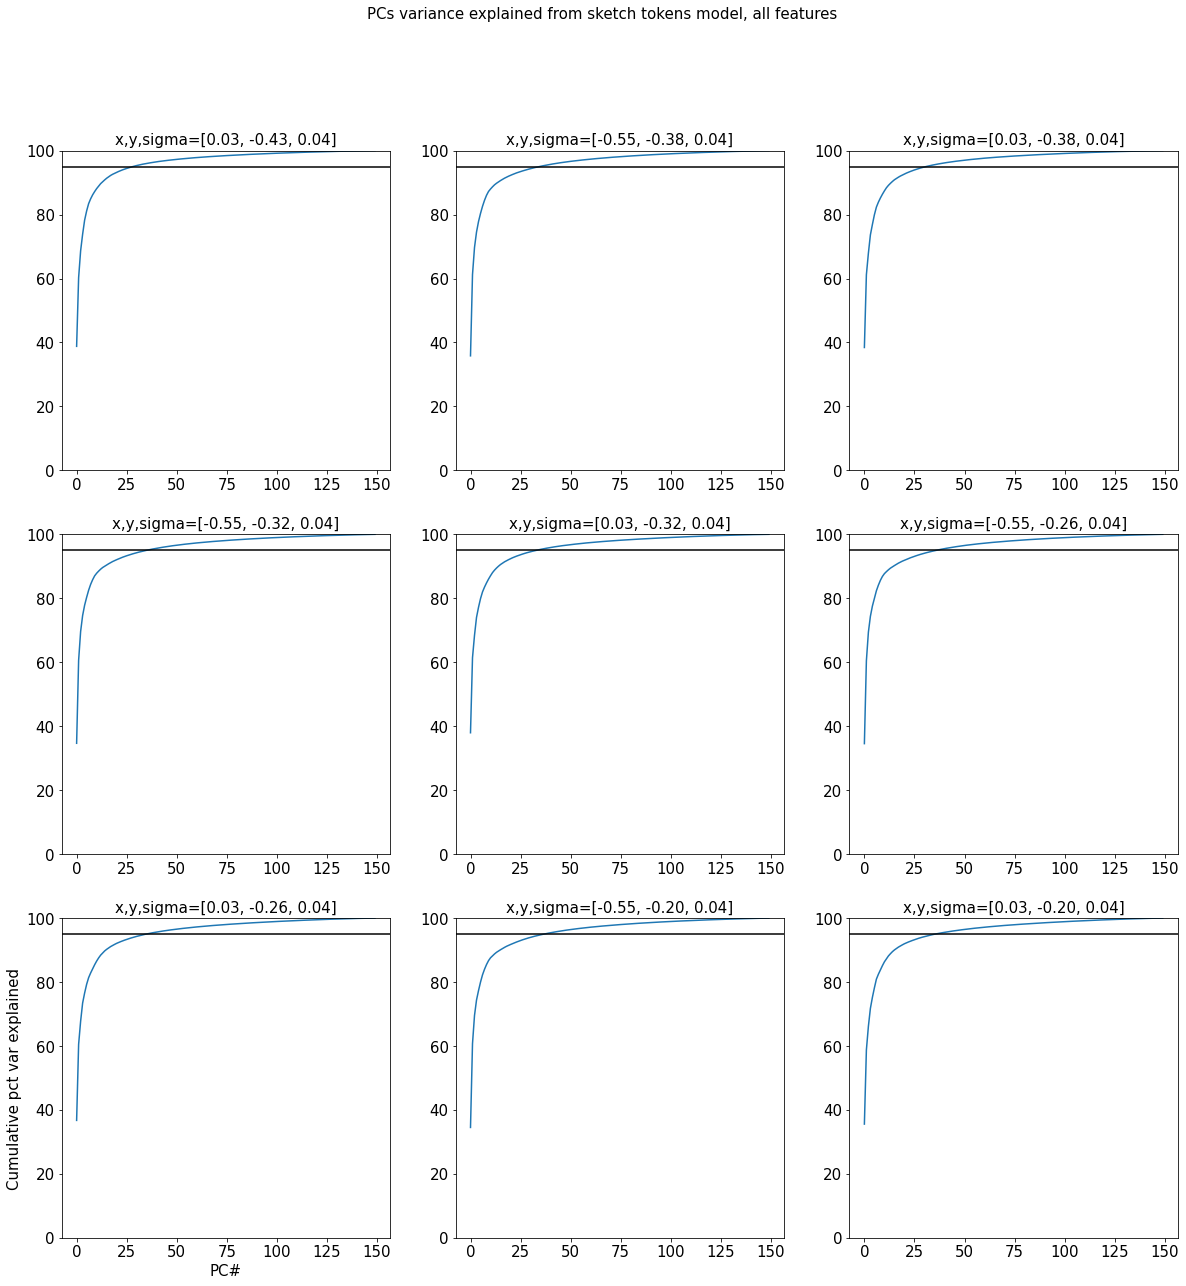

In [45]:
plot_utils.set_all_font_sizes(15)
plt.figure(figsize=(20,20));

# pcs2plot = [0,1]
# colors = cm.Set1(np.linspace(0,1,len(supcat_names)))

mm2plot = np.arange(50,140,10)
npx = int(np.ceil(np.sqrt(len(mm2plot))))
npy = int(np.ceil(len(mm2plot)/npx))

for mi, mm in enumerate(mm2plot):
    ev = ev_each_prf[mm]
    plt.subplot(npx,npy,mi+1)
    
    plt.plot(np.cumsum(ev))
    
    plt.axhline(95,color='k')
    
    if mi==len(mm2plot)-npx:
        plt.xlabel('PC#')
        plt.ylabel('Cumulative pct var explained')
    
#     plt.xticks([])
#     plt.yticks([])
    plt.ylim([0,100])
    
    plt.title('x,y,sigma=[%.2f, %.2f, %.2f]'
          %(models[mm,0], models[mm,1], models[mm,2]));
    
plt.suptitle('PCs variance explained from sketch tokens model, all features\n')
    

Text(0.5, 0.98, 'PCs wts from sketch tokens model, all features\n')

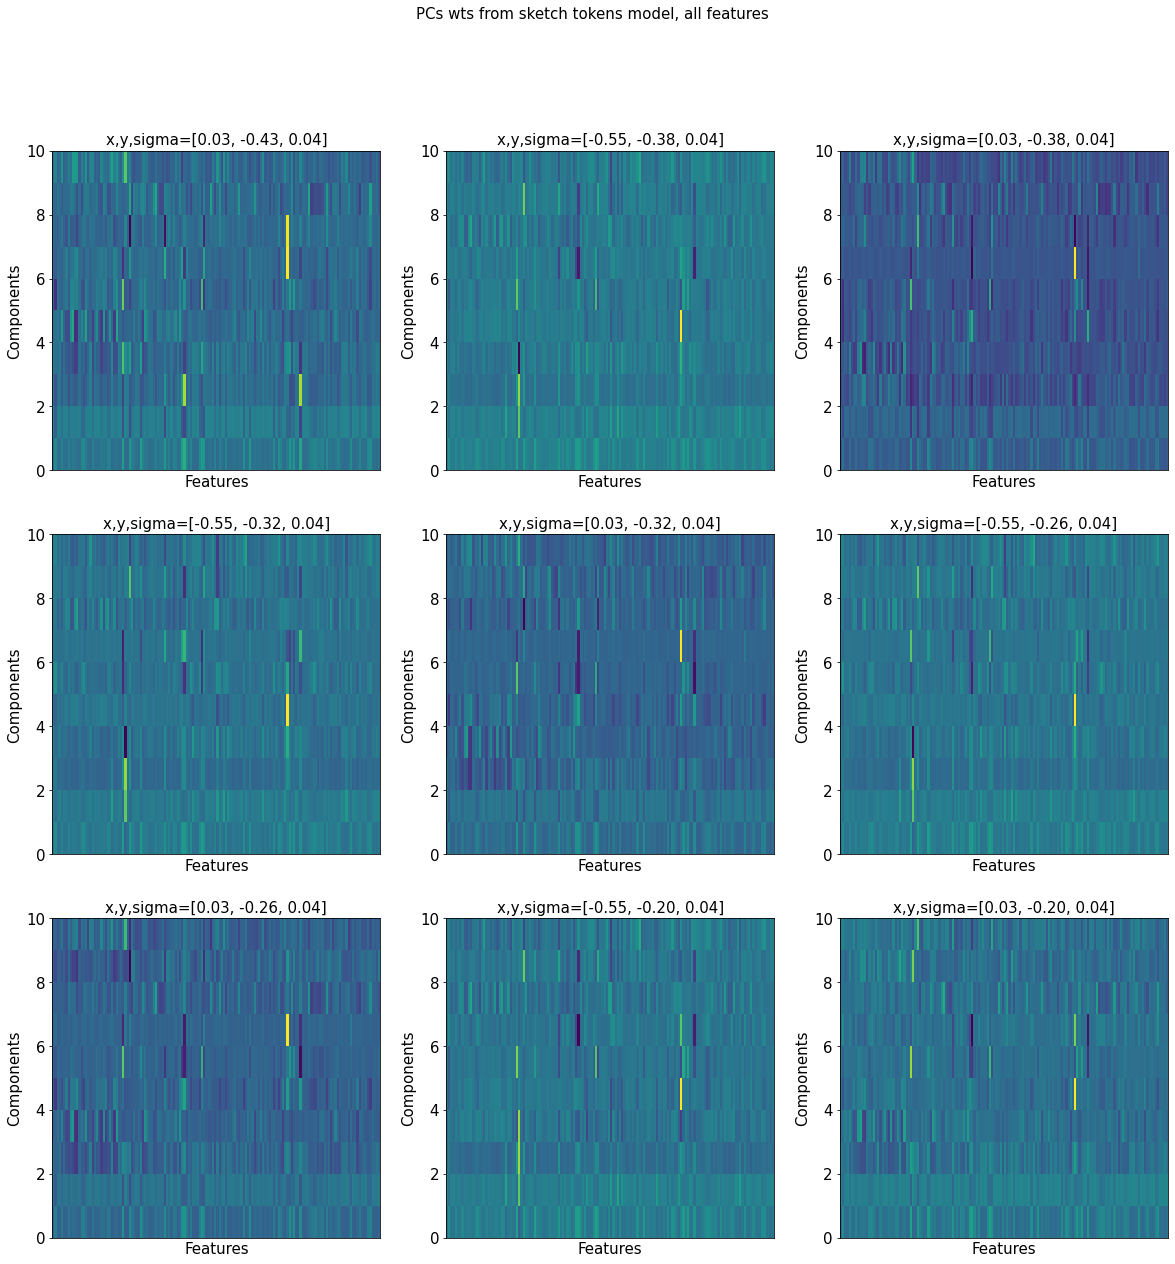

In [49]:
plot_utils.set_all_font_sizes(15)
plt.figure(figsize=(20,20));

# pcs2plot = [0,1]
# colors = cm.Set1(np.linspace(0,1,len(supcat_names)))

mm2plot = np.arange(50,140,10)
npx = int(np.ceil(np.sqrt(len(mm2plot))))
npy = int(np.ceil(len(mm2plot)/npx))

for mi, mm in enumerate(mm2plot):
    wts = wts_each_prf[mm]
    # wts is components x features
    plt.subplot(npx,npy,mi+1)
    
    plt.pcolormesh(wts[0:10,:])
    
#     if mi==len(mm2plot)-npx:
#         plt.xlabel('PC %d (a.u.)'%(pcs2plot[0]+1))
#         plt.ylabel('PC %d (a.u.)'%(pcs2plot[1]+1))
    
    plt.xticks([])
#     plt.yticks([])
    
    plt.ylabel('Components')
    plt.xlabel('Features')
    
    plt.title('x,y,sigma=[%.2f, %.2f, %.2f]'
          %(models[mm,0], models[mm,1], models[mm,2]));
    
plt.suptitle('PCs wts from sketch tokens model, all features\n')
    

Text(0.5, 0.98, 'Comparing PC weights across models: colors are pRF models')

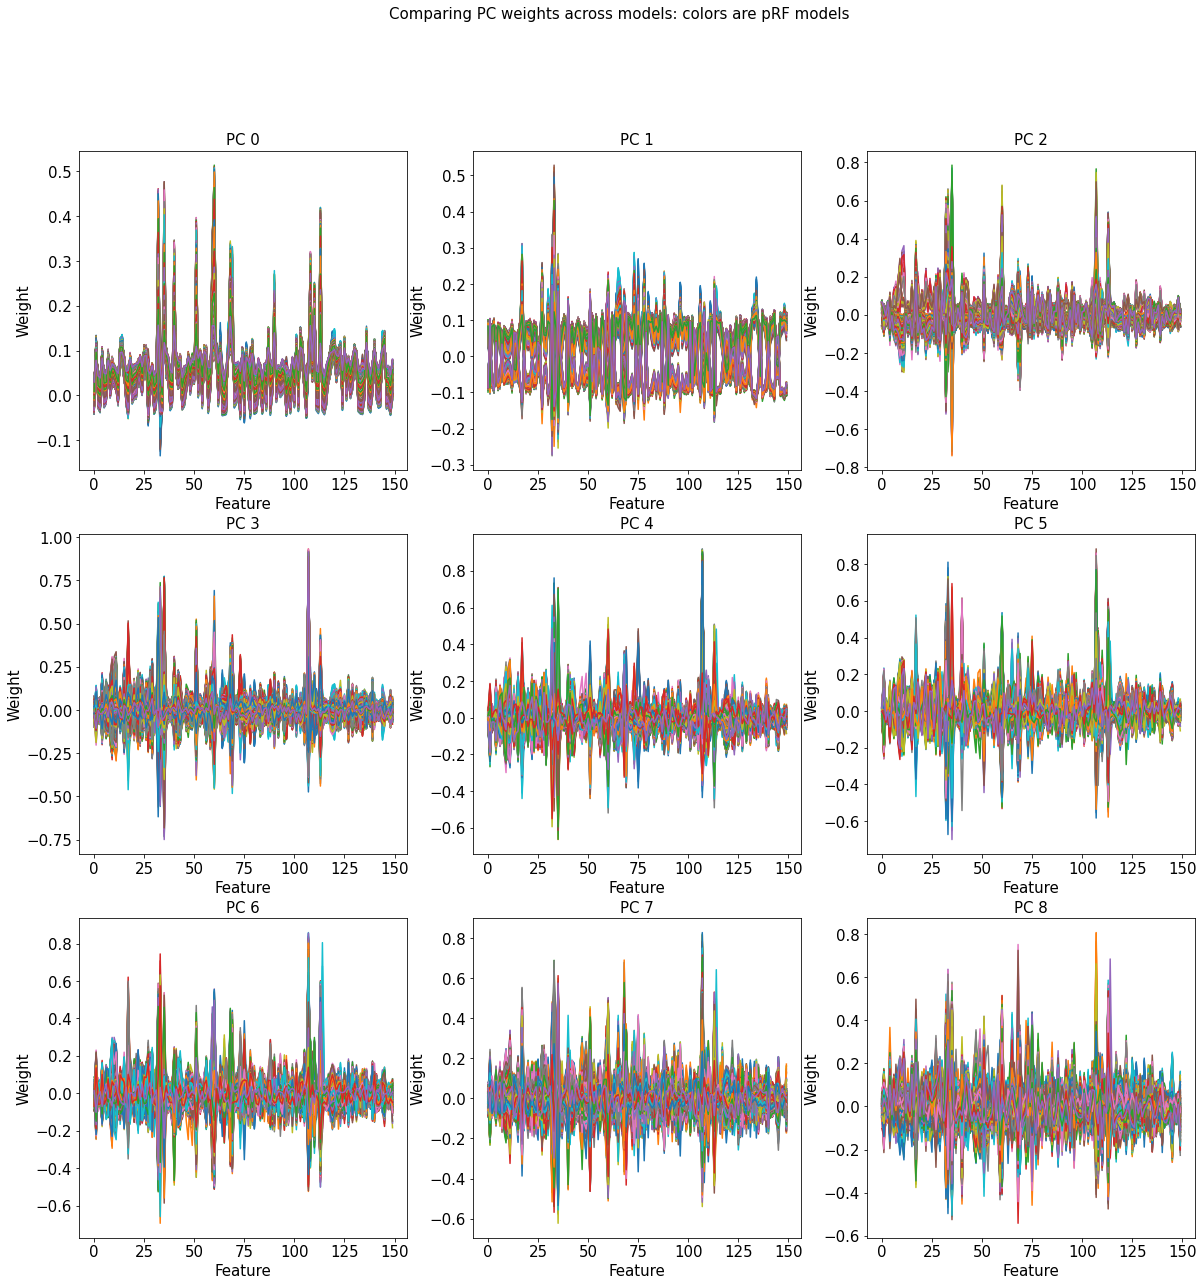

In [65]:
plt.figure(figsize=(20,20));

npx=3;npy=3
for pc in range(9):
    plt.subplot(npx,npy,pc+1)
    w2plot = np.array([wts_each_prf[mm][pc,:] for mm in range(n_prfs)])
    plt.plot(w2plot.T);
    plt.title('PC %d'%pc)
    plt.xlabel('Feature')
    plt.ylabel('Weight')
    
plt.suptitle('Comparing PC weights across models: colors are pRF models')

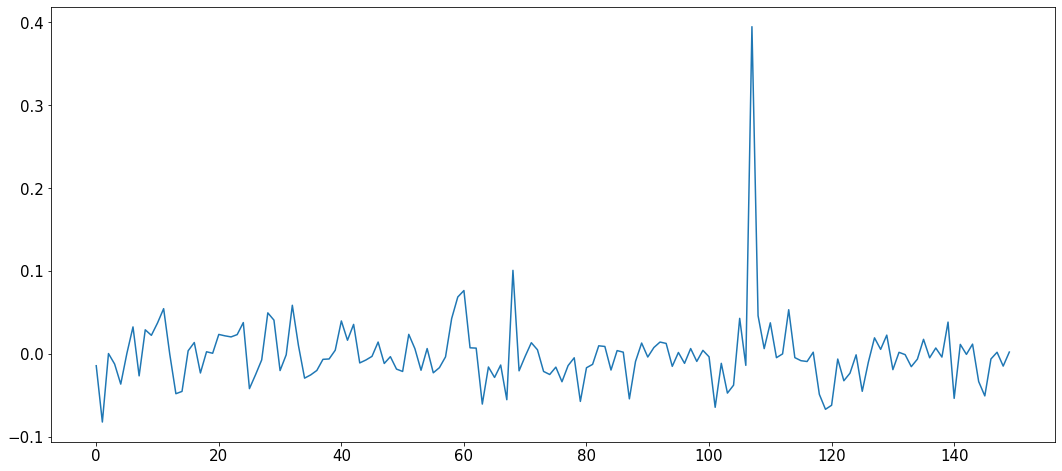

In [128]:
pc=4
w = np.array([wts_each_prf[mm][pc,:] for mm in range(n_prfs)])
wmean = np.mean(w, axis=0)

plt.figure(figsize=(18,8));
plt.plot(wmean)

In [109]:
from scipy.io import loadmat
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
clusters = clust['clusters']['clusters'][0][0]

Text(0.5, 0.98, 'Sketch token features with lowest weights for PC 0')

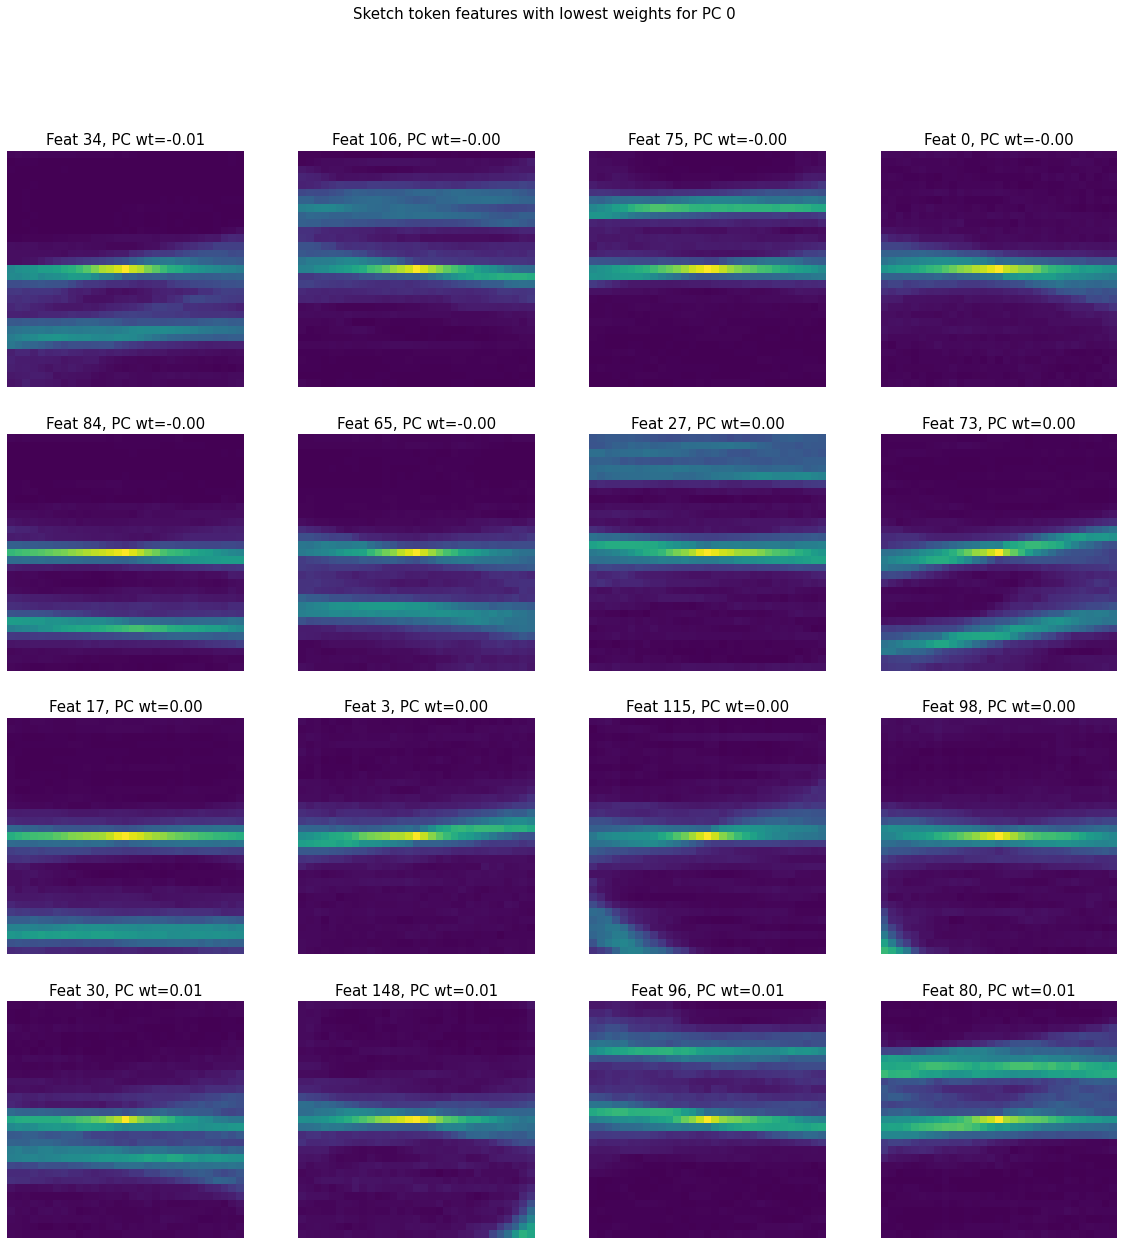

In [152]:
nclusters = clusters.shape[2]
n2plot = 16
# clusters2plot = np.random.choice(np.arange(0,nclusters), n2plot,replace=False)
pc=0
w = np.array([wts_each_prf[mm][pc,:] for mm in range(n_prfs)])
wmean = np.mean(w, axis=0)

clusters2plot = np.flip(np.argsort(wmean))[0:n2plot]
clusters2plot = np.argsort(wmean)[0:n2plot]

plt.figure(figsize=(20,20))
for ci,cc in enumerate(clusters2plot):
    
    plt.subplot(4,4,ci+1)
    plt.pcolormesh(clusters[:,:,cc])
    plt.axis('square')
    plt.axis('off')
    plt.gca().invert_yaxis()
    plt.title('Feat %d, PC wt=%.2f'%(cc, wmean[cc]))
    
plt.suptitle('Sketch token features with lowest weights for PC %d'%pc)